In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
data_dir = "../data"
input_image_path = os.path.join(data_dir, "flower_image.jpg")
txt_file_path = os.path.join(data_dir, "input_image.txt")

In [9]:
def read_and_display_image(path, resize_dim=(256,256)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    
    if resize_dim is not None:
        img = cv2.resize(img, resize_dim)

    plt.imshow(img, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')
    plt.show()

    return img

In [10]:
def write_image_to_txt(img, txt_path):
    with open(txt_path, 'w') as f:
        for pixel in img.flatten():
            f.write(f"{pixel:02X}\n")  # hex format
    print(f"Image written to {txt_path}")

In [11]:
def read_txt_and_plot(txt_path, shape=(256,256)):
    with open(txt_path, 'r') as f:
        pixels = [int(line.strip(), 16) for line in f.readlines()]
    img = np.array(pixels, dtype=np.uint8).reshape(shape)
    plt.imshow(img, cmap='gray')
    plt.title("Image from Text File")
    plt.axis('off')
    plt.show()
    return img


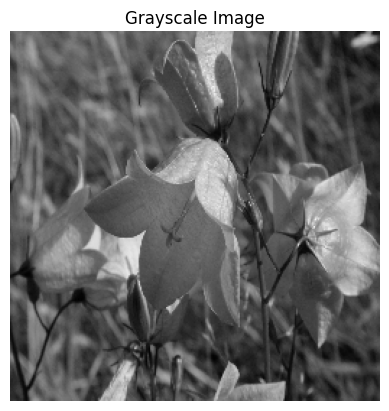

Image written to ../data/input_image.txt


In [14]:
img = read_and_display_image(input_image_path)
write_image_to_txt(img, txt_file_path)

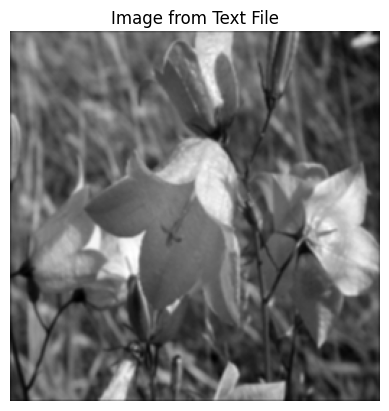

In [ ]:
#output image after applying gaussian blur in Verilog testbench

out_file_path = os.path.join(data_dir, "output_image.txt")
img_from_txt = read_txt_and_plot(out_file_path)